In [ ]:
# Import necessary libraries


""" Fields:
#1 - JobsListActualMaterials

- PartNo - Identifier for part

- Jobkey - unique serial number for this job (used to match with other table)

- JobNo - unique job number

- mach - main machine for job



The following fields have 4 entries, for up to 4 possible materials used on each job

- Macross (width of material, in mm)

- Mdown1 (length of material issued, in meters)

- Mdown (length of material returned, in meters)

- Msquared (square meterage of material used)

- Mused (length of material used)

- MValue (value of material used)

- ppsqm (price per sqm of material)

 File #2 - EstimatedMaterials

Each record here is the estimated material used on a job. Each job can have multiple entries.

Fields:

- Subcode - Material subcode

- MCode - Material code

- Slitwidth - width of material estimated to be used, in mm

- Slitissued - length of material estimated to be used, in meters

- Currencyprice - estimated price of material

- Allocvalue - estimated value of material used

- keyjob - unique key of the job this material is to be used on """

import pandas as pd
import numpy as np

em_df = pd.read_csv('/content/drive/MyDrive/EstimatedMaterials.csv',encoding='cp1252')
job_df=pd.read_csv('/content/drive/MyDrive/JobsListActualMaterials.csv', encoding='cp1252')

em_df.dropna()
job_df.dropna()

,PartNo,jobkey,JobNo,mach,macross1,macross2,macross3,macross4,mdown1,mdown1returned,...,mused3,mused4,mvalue1,mvalue2,mvalue3,mvalue4,ppsqm1,ppsqm2,ppsqm3,ppsqm4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
em_df = em_df.rename(columns={'keyjob': 'jobkey'})

In [ ]:
# newdf=em_df.merge(job_df, right_on=None)
job_df.columns

Index(['PartNo', 'jobkey', 'JobNo', 'mach', 'macross1', 'macross2', 'macross3',
       'macross4', 'mdown1', 'mdown1returned', 'mdown2', 'mdown2returned',
       'mdown3', 'mdown3returned', 'mdown4', 'mdown4returned', 'msquared1',
       'msquared2', 'msquared3', 'msquared4', 'mused1', 'mused2', 'mused3',
       'mused4', 'mvalue1', 'mvalue2', 'mvalue3', 'mvalue4', 'ppsqm1',
       'ppsqm2', 'ppsqm3', 'ppsqm4'],
      dtype='object')

In [ ]:
merged_df = pd.merge(em_df, job_df, on='jobkey')

print(merged_df)

    SUBCODE       MCode  slitwidth   slitissued  currency  currencyprice  \
0     AM172   AM172-170      170.0  4336.250000       NaN         0.5445   
1     AM172   AM172-230      230.0  5209.500000       NaN         0.5445   
2    02-707  02-707-220      220.0    61.250000       NaN         4.9930   
3    AKU834  AKU834-250      250.0  1095.000000       NaN         0.6215   
4    01-701  01-701-220      220.0   265.500000       NaN         3.8940   
..      ...         ...        ...          ...       ...            ...   
669   bc062   bc062-226      226.0   733.500000       NaN            NaN   
670  02-707  02-707-265      265.0   102.611111       NaN         4.9930   
671   WT200   WT200-152      152.0   578.800000       NaN         3.5970   
672  01-725  01-725-152      152.0    38.250000       NaN         2.9260   
673  01-725  01-725-152      152.0    21.750000       NaN         2.9260   

     allocvalue      jobkey                      PartNo  JobNo  ... mused3  \
0    401.

In [ ]:
merged_df.dropna()

,SUBCODE,MCode,slitwidth,slitissued,currency,currencyprice,allocvalue,jobkey,PartNo,JobNo,...,mused3,mused4,mvalue1,mvalue2,mvalue3,mvalue4,ppsqm1,ppsqm2,ppsqm3,ppsqm4


In [ ]:
merged_df.columns

Index(['SUBCODE', 'MCode', 'slitwidth', 'slitissued', 'currency',
       'currencyprice', 'allocvalue', 'jobkey', 'PartNo', 'JobNo', 'mach',
       'macross1', 'macross2', 'macross3', 'macross4', 'mdown1',
       'mdown1returned', 'mdown2', 'mdown2returned', 'mdown3',
       'mdown3returned', 'mdown4', 'mdown4returned', 'msquared1', 'msquared2',
       'msquared3', 'msquared4', 'mused1', 'mused2', 'mused3', 'mused4',
       'mvalue1', 'mvalue2', 'mvalue3', 'mvalue4', 'ppsqm1', 'ppsqm2',
       'ppsqm3', 'ppsqm4'],
      dtype='object')

In [ ]:
# merged_df = merged_df.drop('macross2', axis=1) Already executed
merged_df = merged_df.drop('macross3', axis=1)
merged_df = merged_df.drop('macross4', axis=1)
merged_df = merged_df.drop('mdown2', axis=1)
merged_df = merged_df.drop('mdown2returned', axis=1)
merged_df = merged_df.drop('mdown3', axis=1)
merged_df = merged_df.drop('mdown3returned', axis=1)
merged_df = merged_df.drop('mdown4', axis=1)
merged_df = merged_df.drop('mdown4returned', axis=1)
merged_df = merged_df.drop('msquared2', axis=1)
merged_df = merged_df.drop('msquared3', axis=1)
merged_df = merged_df.drop('msquared4', axis=1)
merged_df = merged_df.drop('mused2', axis=1)
merged_df = merged_df.drop('mused3', axis=1)
merged_df = merged_df.drop('mused4', axis=1)
merged_df = merged_df.drop('mvalue2', axis=1)
merged_df = merged_df.drop('mvalue3', axis=1)
merged_df = merged_df.drop('mvalue4', axis=1)

In [ ]:
merged_df = merged_df.drop('ppsqm2', axis=1)
merged_df = merged_df.drop('ppsqm3', axis=1)
merged_df = merged_df.drop('ppsqm4', axis=1)

In [ ]:
merged_df['currency']="Euro"
merged_df

,SUBCODE,MCode,slitwidth,slitissued,currency,currencyprice,allocvalue,jobkey,PartNo,JobNo,mach,macross1,macross2,mdown1,mdown1returned,msquared1,mused1,mvalue1,ppsqm1
0,AM172,AM172-170,170.0,4336.250000,Euro,0.5445,401.384981,4729420373,30-934,47294,Comco,220,NaN,6485.0,1750.0,1041.70,4735.0,693.25135,0.6655
1,AM172,AM172-230,230.0,5209.500000,Euro,0.5445,652.411732,4729520374,30-935,47295,Comco,250,NaN,6030.0,700.0,1332.50,5330.0,839.87475,0.6303
2,02-707,02-707-220,220.0,61.250000,Euro,4.9930,67.280675,4729620375,X-190071000,47296,Hotfoil,220,NaN,525.0,460.0,14.30,65.0,71.3999,4.993
3,AKU834,AKU834-250,250.0,1095.000000,Euro,0.6215,170.135625,4729720377,801883A-01,47297,Comco,250,NaN,2000.0,838.0,290.50,1162.0,186.93675,0.6435
4,01-701,01-701-220,220.0,265.500000,Euro,3.8940,227.448540,4729820378,01/73866/0,47298,Comco,220,200.0,985.0,687.0,65.56,298.0,255.29064,3.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,bc062,bc062-226,226.0,733.500000,Euro,NaN,0.000000,4832523066,BH79J802H01,48325,Smag,220,226.0,3036.0,2292.0,163.68,744.0,549.1464,3.355
670,02-707,02-707-265,265.0,102.611111,Euro,4.9930,135.769379,4833223082,X-01/21251/0,48332,Arpeco,160,NaN,985.0,825.0,25.60,160.0,122.752,4.795
671,WT200,WT200-152,152.0,578.800000,Euro,3.5970,316.455427,4833823088,997903,48338,Arpeco,152,NaN,880.0,240.0,97.28,640.0,349.91616,3.597
672,01-725,01-725-152,152.0,38.250000,Euro,2.9260,17.011764,4834923183,NPJU30022 (01-725 TRIAL),48349,Arpeco,220,NaN,70.0,NaN,15.40,70.0,45.0604,2.926


In [ ]:
merged_df.columns

Index(['SUBCODE', 'MCode', 'slitwidth', 'slitissued', 'currency',
       'currencyprice', 'allocvalue', 'jobkey', 'PartNo', 'JobNo', 'mach',
       'macross1', 'macross2', 'mdown1', 'mdown1returned', 'msquared1',
       'mused1', 'mvalue1', 'ppsqm1'],
      dtype='object')

<ipython-input-13-063df23bc856>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


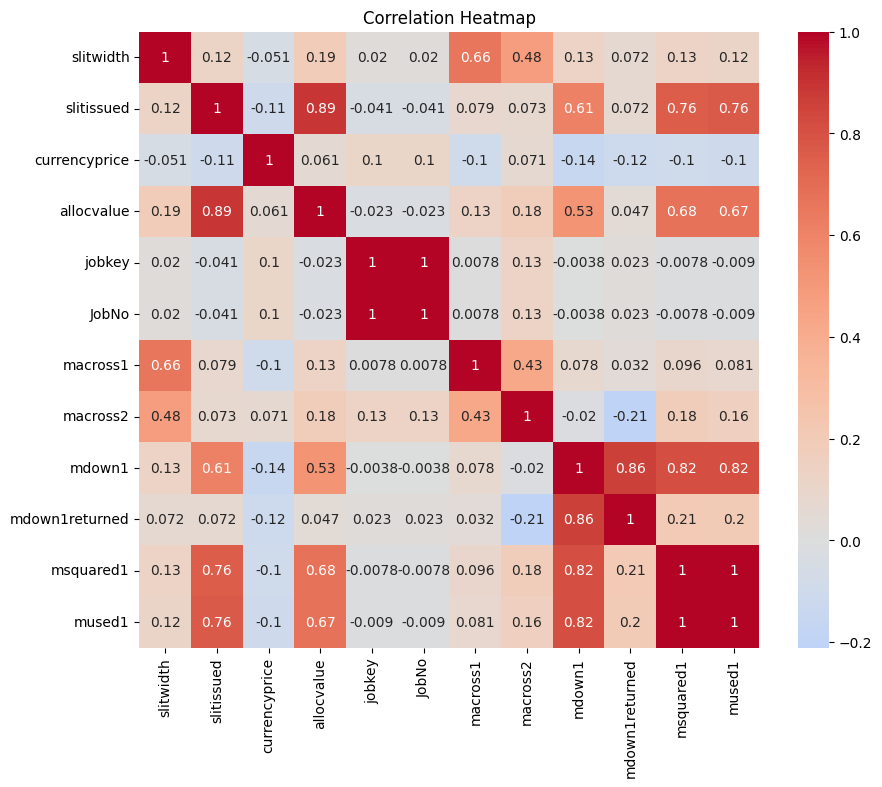

In [ ]:
# finding correlation between the variables
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = merged_df.corr()

# Create\ing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
merged_df['currencyprice'] = merged_df['currencyprice'].astype(float)
merged_df['allocvalue'] = merged_df['allocvalue'].astype(float)


merged_df['estimated cost']=merged_df['currencyprice']*merged_df['allocvalue']


In [ ]:
merged_df

,SUBCODE,MCode,slitwidth,slitissued,currency,currencyprice,allocvalue,jobkey,PartNo,JobNo,mach,macross1,macross2,mdown1,mdown1returned,msquared1,mused1,mvalue1,ppsqm1,estimated cost
0,AM172,AM172-170,170.0,4336.250000,Euro,0.5445,401.384981,4729420373,30-934,47294,Comco,220,NaN,6485.0,1750.0,1041.70,4735.0,693.25135,0.6655,218.554122
1,AM172,AM172-230,230.0,5209.500000,Euro,0.5445,652.411732,4729520374,30-935,47295,Comco,250,NaN,6030.0,700.0,1332.50,5330.0,839.87475,0.6303,355.238188
2,02-707,02-707-220,220.0,61.250000,Euro,4.9930,67.280675,4729620375,X-190071000,47296,Hotfoil,220,NaN,525.0,460.0,14.30,65.0,71.3999,4.993,335.932410
3,AKU834,AKU834-250,250.0,1095.000000,Euro,0.6215,170.135625,4729720377,801883A-01,47297,Comco,250,NaN,2000.0,838.0,290.50,1162.0,186.93675,0.6435,105.739291
4,01-701,01-701-220,220.0,265.500000,Euro,3.8940,227.448540,4729820378,01/73866/0,47298,Comco,220,200.0,985.0,687.0,65.56,298.0,255.29064,3.894,885.684615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,bc062,bc062-226,226.0,733.500000,Euro,NaN,0.000000,4832523066,BH79J802H01,48325,Smag,220,226.0,3036.0,2292.0,163.68,744.0,549.1464,3.355,NaN
670,02-707,02-707-265,265.0,102.611111,Euro,4.9930,135.769379,4833223082,X-01/21251/0,48332,Arpeco,160,NaN,985.0,825.0,25.60,160.0,122.752,4.795,677.896507
671,WT200,WT200-152,152.0,578.800000,Euro,3.5970,316.455427,4833823088,997903,48338,Arpeco,152,NaN,880.0,240.0,97.28,640.0,349.91616,3.597,1138.290172
672,01-725,01-725-152,152.0,38.250000,Euro,2.9260,17.011764,4834923183,NPJU30022 (01-725 TRIAL),48349,Arpeco,220,NaN,70.0,NaN,15.40,70.0,45.0604,2.926,49.776421


In [ ]:
merged_df['mvalue1'] = merged_df['mvalue1'].replace('?', '0')

# merged_df['mvalue1'] = pd.to_numeric(merged_df['mvalue1'])
merged_df['mvalue1'] = merged_df['mvalue1'].astype(float)
merged_df['ppsqm1'] = merged_df['ppsqm1'].replace('?', '0')
merged_df['ppsqm1'] = merged_df['ppsqm1'].astype(float)

merged_df['actual cost']=(merged_df['mvalue1'])*(merged_df['ppsqm1'])

In [ ]:
merged_df
columns_to_display = ['SUBCODE', 'MCode', 'slitwidth', 'slitissued','allocvalue','macross1','ppsqm1','mvalue1','estimated cost','actual cost']

# Display the first 10 rows with the specified columns
#print(merged_df[columns_to_display].head(10))

json_data = merged_df[columns_to_display].head(10).to_json(orient='records')

print(json_data)

[{"SUBCODE":"AM172","MCode":"AM172-170","slitwidth":170.0,"slitissued":4336.25,"allocvalue":401.3849813,"macross1":220,"ppsqm1":0.6655,"mvalue1":693.25135,"estimated cost":218.5541223178,"actual cost":461.358773425},{"SUBCODE":"AM172","MCode":"AM172-230","slitwidth":230.0,"slitissued":5209.5,"allocvalue":652.4117325,"macross1":250,"ppsqm1":0.6303,"mvalue1":839.87475,"estimated cost":355.2381883462,"actual cost":529.373054925},{"SUBCODE":"02-707","MCode":"02-707-220","slitwidth":220.0,"slitissued":61.25,"allocvalue":67.280675,"macross1":220,"ppsqm1":4.993,"mvalue1":71.3999,"estimated cost":335.932410275,"actual cost":356.4997007},{"SUBCODE":"AKU834","MCode":"AKU834-250","slitwidth":250.0,"slitissued":1095.0,"allocvalue":170.135625,"macross1":250,"ppsqm1":0.6435,"mvalue1":186.93675,"estimated cost":105.7392909375,"actual cost":120.293798625},{"SUBCODE":"01-701","MCode":"01-701-220","slitwidth":220.0,"slitissued":265.5,"allocvalue":227.44854,"macross1":220,"ppsqm1":3.894,"mvalue1":255.290

                slitwidth  slitissued  currencyprice  allocvalue    jobkey  \
slitwidth        1.000000    0.122063      -0.051159    0.191858  0.020097   
slitissued       0.122063    1.000000      -0.106410    0.887187 -0.041432   
currencyprice   -0.051159   -0.106410       1.000000    0.060557  0.101534   
allocvalue       0.191858    0.887187       0.060557    1.000000 -0.023033   
jobkey           0.020097   -0.041432       0.101534   -0.023033  1.000000   
JobNo            0.020097   -0.041432       0.101534   -0.023033  1.000000   
macross1         0.656915    0.078867      -0.101662    0.133583  0.007827   
macross2         0.477628    0.073363       0.071031    0.177631  0.129285   
mdown1           0.126480    0.612730      -0.144836    0.531514 -0.003753   
mdown1returned   0.072109    0.071738      -0.115154    0.047281  0.023444   
msquared1        0.126963    0.762349      -0.100592    0.675401 -0.007788   
mused1           0.117656    0.763635      -0.104773    0.672138

<ipython-input-18-4eaecc9e1b4c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


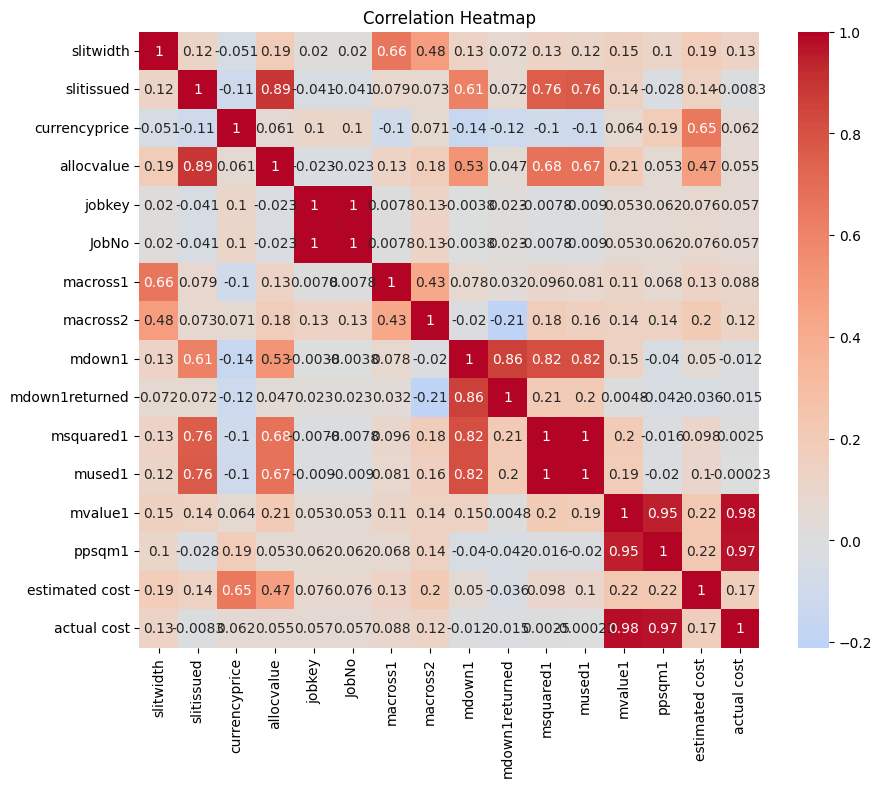

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = merged_df.corr()
print(correlation_matrix)

# Create\ing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Bar Chart Example')

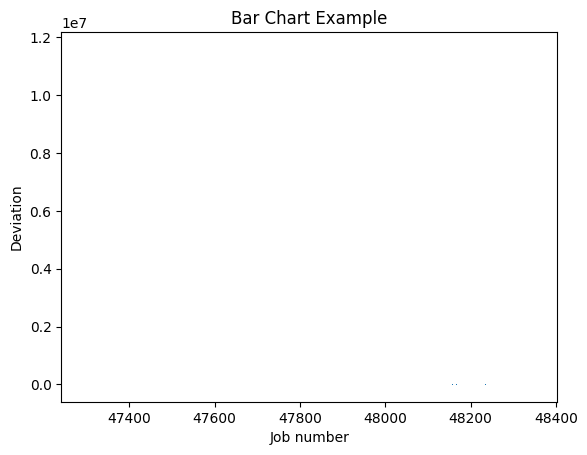

In [ ]:
#sns.hist(x=merged_df['JobNo'], y=(merged_df['actual cost']-merged_df['estimated cost']))

plt.bar(merged_df['JobNo'], (merged_df['actual cost']-merged_df['estimated cost']))

# Add labels and title
plt.xlabel('Job number')
plt.ylabel('Deviation')
plt.title('Bar Chart Example')

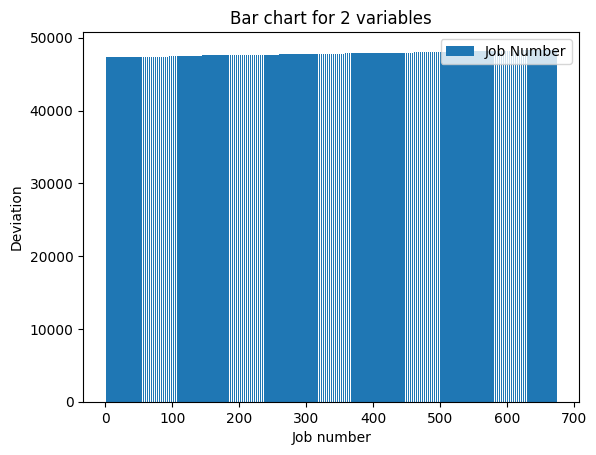

In [ ]:
from sqlalchemy import true
y1 = merged_df['JobNo']
y2 = merged_df['estimated cost']- merged_df['actual cost']
x = [i for i in range(1,675)]

# # Bar chart
fig, ax = plt.subplots()
ax.bar(x, y1, label="Job Number")
#ax.bar(x, y2, label="Cost difference")
ax.set_xlabel("Job number")
ax.set_ylabel("Deviation")
ax.set_title("Bar chart for 2 variables")
ax.set_navigate_mode(b=true)
ax.legend()
plt.show()

In [ ]:
"""import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np

# Calculate variance for each category
variance = [actual - estimated for actual, estimated in zip(merged_df['actual cost'], merged_df['estimated cost'])]

# Create a bar chart
fig, ax = plt.subplots()
x = np.arange(len(merged_df['JobNo']))
width = 0.35
rects1 = ax.bar(x - width/2, actual_values, width, label='Actual')
rects2 = ax.bar(x + width/2, estimated_values, width, label='Estimated')

ax.set_ylabel('Values')
ax.set_title('Actual vs Estimated Values')
ax.set_xticks(x)
ax.set_xticklabels(merged_df['JobNo'])
ax.legend()

# Function to update the bar chart based on search input
def update_chart():
    selected_category = combo.get()
    index = categories.index(selected_category)
    rects1[index].set_height(int(actual_entry.get()))
    rects2[index].set_height(int(estimated_entry.get()))
    plt.draw()

# Create a search interface using Tkinter
root = tk.Tk()
root.title('Variance Visualization')

tk.Label(root, text='Select Job No:').pack()
combo = ttk.Combobox(root, values=categories)
combo.pack()

tk.Label(root, text='Enter Actual Value:').pack()
actual_entry = tk.Entry(root)
actual_entry.pack()

tk.Label(root, text='Enter Estimated Value:').pack()
estimated_entry = tk.Entry(root)
estimated_entry.pack()

update_button = tk.Button(root, text='Update Chart', command=update_chart)
update_button.pack()

plt.tight_layout()
plt.show()

root.mainloop() """


"import tkinter as tk\nfrom tkinter import ttk\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Calculate variance for each category\nvariance = [actual - estimated for actual, estimated in zip(merged_df['actual cost'], merged_df['estimated cost'])]\n\n# Create a bar chart\nfig, ax = plt.subplots()\nx = np.arange(len(merged_df['JobNo']))\nwidth = 0.35\nrects1 = ax.bar(x - width/2, actual_values, width, label='Actual')\nrects2 = ax.bar(x + width/2, estimated_values, width, label='Estimated')\n\nax.set_ylabel('Values')\nax.set_title('Actual vs Estimated Values')\nax.set_xticks(x)\nax.set_xticklabels(merged_df['JobNo'])\nax.legend()\n\n# Function to update the bar chart based on search input\ndef update_chart():\n    selected_category = combo.get()\n    index = categories.index(selected_category)\n    rects1[index].set_height(int(actual_entry.get()))\n    rects2[index].set_height(int(estimated_entry.get()))\n    plt.draw()\n\n# Create a search interface using Tkinter\nroot = tk.T